In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [155]:
data = pd.read_csv("data.csv")

In [157]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,25436,In the forest Sea view Two minutes to the city.,105823,Yesim,NaN,Besiktas,41.078830,29.038630,Entire home/apt,NaN,100,0,NaN,NaN,1,0,0,NaN
1,34177,PETIT HOUSE,147330,Ercan,NaN,Besiktas,41.066810,29.040350,Entire home/apt,1587.0,100,16,2024-01-03,0.15,2,364,1,NaN
2,42835,Cozy apartment in the heart of Istanbul,187026,Attila,NaN,Sisli,41.043030,28.985310,Entire home/apt,NaN,100,0,NaN,NaN,3,87,0,NaN
3,73477,Sea View Apartment in Taksim/ Center of Istanbul,383789,Berat,NaN,Beyoglu,41.034447,28.987555,Entire home/apt,1397.0,100,11,2024-01-13,0.31,2,223,1,NaN
4,77292,3 Bedroom Apartment with Terrace Bosphorus View,414003,Omer Faruk,NaN,Beyoglu,41.035830,28.989890,Entire home/apt,5988.0,2,14,2024-08-11,0.26,13,344,2,34-554


In [159]:
print('Number of features: {}'.format(data.shape[1]))
print('Number of entries: {}'.format(data.shape[0]))

Number of features: 18
Number of entries: 29400


In [161]:
data.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,2.940000e+04,29400,2.940000e+04,29400,0.0,29400,29400.000000,29400.000000,29400,2.515500e+04,29400.000000,29400.000000,18080,18080.000000,29400.000000,29400.000000,29400.000000,16421
unique,NaN,27700,NaN,4468,NaN,39,NaN,NaN,4,NaN,NaN,NaN,1464,NaN,NaN,NaN,NaN,4389
top,NaN,Linkinn Luxury Residence & Spa,NaN,Tevfik,NaN,Beyoglu,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2024-12-15,NaN,NaN,NaN,NaN,Exempt
freq,NaN,78,NaN,488,NaN,7584,NaN,NaN,20379,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,7943
mean,7.744239e+17,NaN,3.418261e+08,NaN,NaN,NaN,41.029001,28.969106,NaN,4.065964e+03,51.485068,16.740850,NaN,1.130144,19.911224,270.577823,5.879796,NaN
std,4.458430e+17,NaN,1.955984e+08,NaN,NaN,NaN,0.048626,0.154899,NaN,3.062186e+04,63.885335,39.719611,NaN,1.324909,63.636410,113.445871,12.227312,NaN
min,2.543600e+04,NaN,8.592300e+04,NaN,NaN,NaN,40.815284,28.007570,NaN,8.000000e+01,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,6.150384e+17,NaN,1.640581e+08,NaN,NaN,NaN,41.004660,28.962095,NaN,1.538000e+03,2.000000,0.000000,NaN,0.210000,1.000000,180.000000,0.000000,NaN
50%,9.034532e+17,NaN,4.059698e+08,NaN,NaN,NaN,41.030622,28.980060,NaN,2.400000e+03,5.000000,2.000000,NaN,0.650000,5.000000,330.000000,0.000000,NaN
75%,1.125207e+18,NaN,4.990171e+08,NaN,NaN,NaN,41.049209,29.003930,NaN,3.835000e+03,100.000000,14.000000,NaN,1.600000,12.000000,364.000000,5.000000,NaN


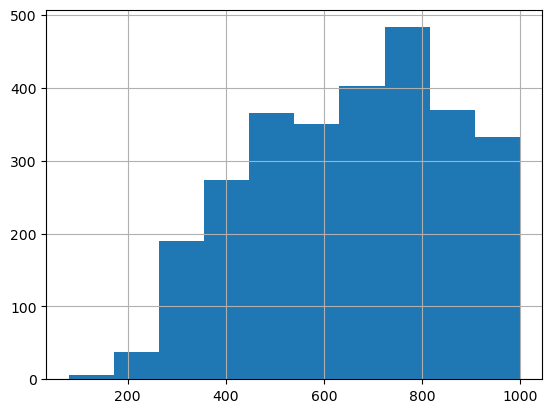

In [163]:
hist_price1=data["price"][data["price"]<1000].hist()

In [165]:
data = data[data["price"]<1000]
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9,135858,A cozy studio near center,665735,Kemal,NaN,Beyoglu,41.04232,28.976089,Entire home/apt,843.0,100,19,2024-09-01,0.12,4,337,3,NaN
10,135956,Private room in shared flat-for ONLY female gu...,666066,Ali,NaN,Beyoglu,41.02984,28.975690,Private room,515.0,100,43,2024-04-05,0.27,8,155,1,Exempt
33,937206,Studio Apartment in Beyoglu/TAKSIM,2781217,Fatma,NaN,Beyoglu,41.03685,28.977020,Entire home/apt,735.0,100,55,2023-11-03,0.38,6,365,0,NaN
36,940808,Small Studio3@TAKSIM Very Touristic,4172454,Safa,NaN,Beyoglu,41.03965,28.981840,Hotel room,948.0,100,120,2023-11-02,1.10,13,365,0,NaN
43,940826,1+1 Suit 3 @ TAKSIM very Touristic,4172454,Safa,NaN,Beyoglu,41.03965,28.981840,Hotel room,984.0,100,92,2024-08-10,0.84,13,365,5,NaN


In [167]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [169]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9,135858,A cozy studio near center,665735,Kemal,NaN,Beyoglu,41.04232,28.976089,Entire home/apt,843.0,100,19,2024-09-01,0.12,4,337,3,NaN
10,135956,Private room in shared flat-for ONLY female gu...,666066,Ali,NaN,Beyoglu,41.02984,28.975690,Private room,515.0,100,43,2024-04-05,0.27,8,155,1,Exempt
33,937206,Studio Apartment in Beyoglu/TAKSIM,2781217,Fatma,NaN,Beyoglu,41.03685,28.977020,Entire home/apt,735.0,100,55,2023-11-03,0.38,6,365,0,NaN
36,940808,Small Studio3@TAKSIM Very Touristic,4172454,Safa,NaN,Beyoglu,41.03965,28.981840,Hotel room,948.0,100,120,2023-11-02,1.10,13,365,0,NaN
43,940826,1+1 Suit 3 @ TAKSIM very Touristic,4172454,Safa,NaN,Beyoglu,41.03965,28.981840,Hotel room,984.0,100,92,2024-08-10,0.84,13,365,5,NaN


In [171]:
data.drop(['name','id', 'host_id','last_review','host_name','neighbourhood_group'], axis = 1, inplace = True)

In [173]:
data.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9,Beyoglu,41.04232,28.976089,Entire home/apt,843.0,100,19,0.12,4,337,3,NaN
10,Beyoglu,41.02984,28.975690,Private room,515.0,100,43,0.27,8,155,1,Exempt
33,Beyoglu,41.03685,28.977020,Entire home/apt,735.0,100,55,0.38,6,365,0,NaN
36,Beyoglu,41.03965,28.981840,Hotel room,948.0,100,120,1.10,13,365,0,NaN
43,Beyoglu,41.03965,28.981840,Hotel room,984.0,100,92,0.84,13,365,5,NaN


In [209]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

In [213]:
data.head(10)

,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9,12,0,843.0,100,4,337,3,158
10,12,2,515.0,100,8,155,1,153
33,12,0,735.0,100,6,365,0,158
36,12,1,948.0,100,13,365,0,158
43,12,1,984.0,100,13,365,5,158
54,32,2,635.0,100,10,365,1,158
62,32,2,705.0,100,10,365,0,158
72,12,2,809.0,3,6,357,12,115
75,32,2,730.0,100,10,365,0,158
79,32,2,919.0,101,2,365,1,158


In [179]:
#Drop NaN values
#Since reviews_per_month column has many NaN values so lets replace them with 0 instead of removing
data.fillna({'reviews_per_month' : 0}, inplace = True)
#remove Nan from rest of the column
data.isnull().sum() #to check for null values in each column
data.dropna(how = 'any', inplace = True)

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

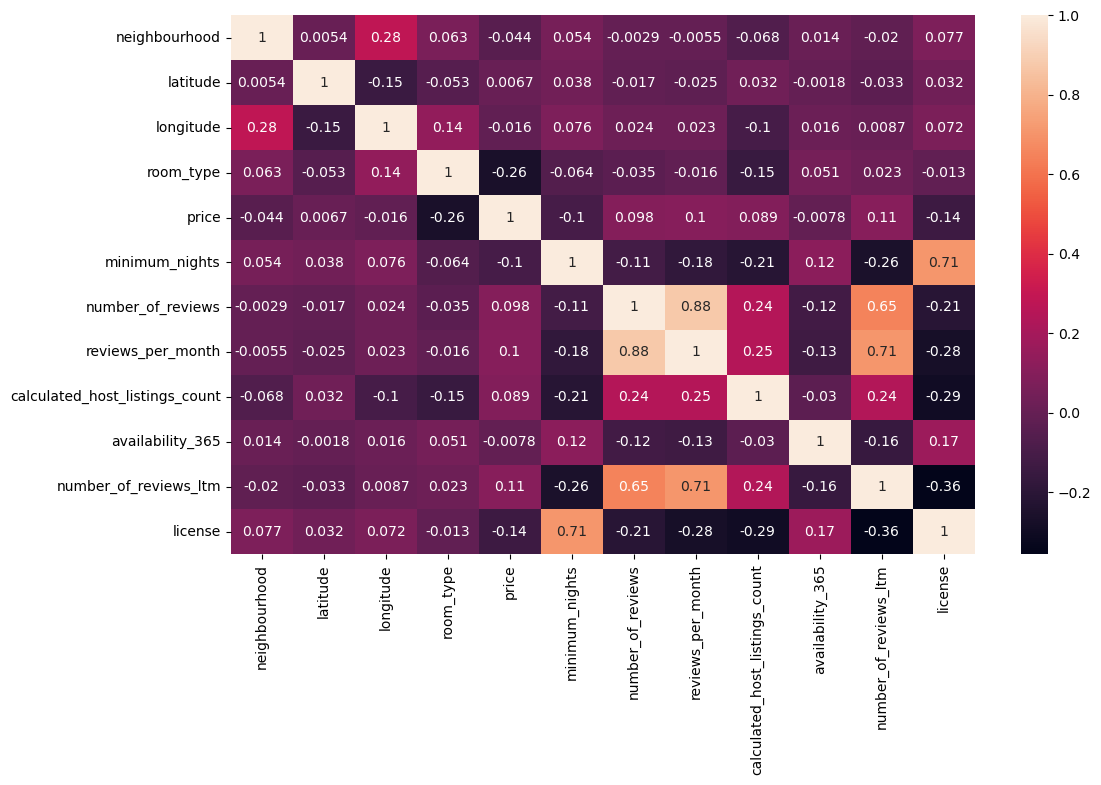

In [181]:
#Get correlation between different features
corr = data.corr(method='kendall')
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)
data.columns

In [183]:
data.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9,12,41.04232,28.976089,0,843.0,100,19,0.12,4,337,3,158
10,12,41.02984,28.975690,2,515.0,100,43,0.27,8,155,1,153
33,12,41.03685,28.977020,0,735.0,100,55,0.38,6,365,0,158
36,12,41.03965,28.981840,1,948.0,100,120,1.10,13,365,0,158
43,12,41.03965,28.981840,1,984.0,100,92,0.84,13,365,5,158


In [187]:
#Regression analysis to predict the price
#drop unneceassy columns
data.drop(['latitude','longitude','number_of_reviews','reviews_per_month'], axis = 1, inplace = True)
X = data.iloc[:,[0,1,3,4,5]]
y = data['price']

In [189]:
#Label encoding
X = pd.get_dummies(X, columns=['neighbourhood', 'room_type'], drop_first=True)


In [191]:
#splitting the dataset into test and training data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [193]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

R2 score:  13.370352055215594
RMSE:  187.9094165218833
   Actual Values  Predicted Values
0          900.0        646.846762
1          400.0        723.241340
2          809.0        626.418704
3          583.0        674.322286
4          677.0        637.788737


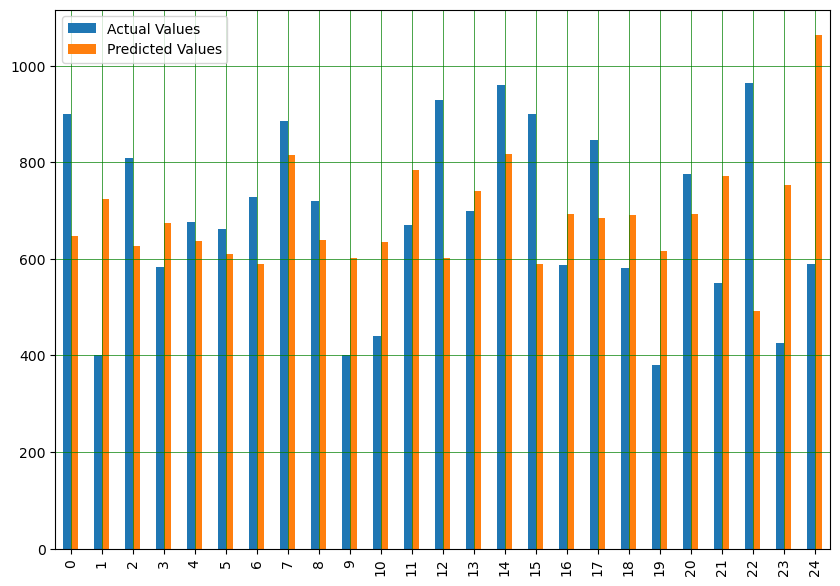

In [195]:
#Prepare a Linear Regression Model

reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
#R2 score
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

R2 score:  14.232173425675965
RMSE:  186.97238664724668
   Actual Values  Predicted Values
0          900.0        646.828254
1          400.0        719.564650
2          809.0        623.537203
3          583.0        670.832218
4          677.0        643.120121


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.076e+06, tolerance: 9.179e+03
  model = cd_fast.enet_coordinate_descent(


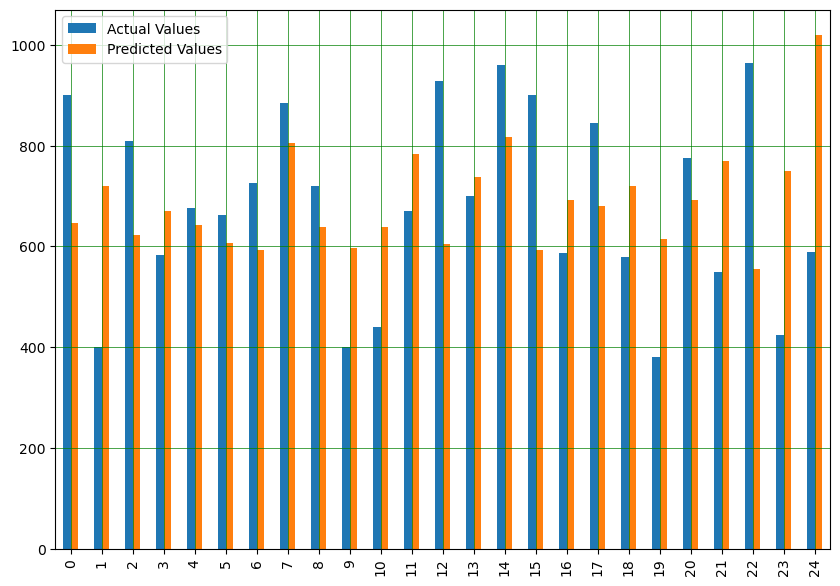

In [197]:
#Lasso regression
regL1 = Lasso(alpha=0.01)
regL1.fit(X_train, y_train) 

y_pred=regL1.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

R2 score:  -17.59328423543385
RMSE:  218.93063121555716
   Actual Values  Predicted Values
0          900.0        642.744186
1          400.0        799.000000
2          809.0        615.017857
3          583.0        563.000000
4          677.0        473.000000


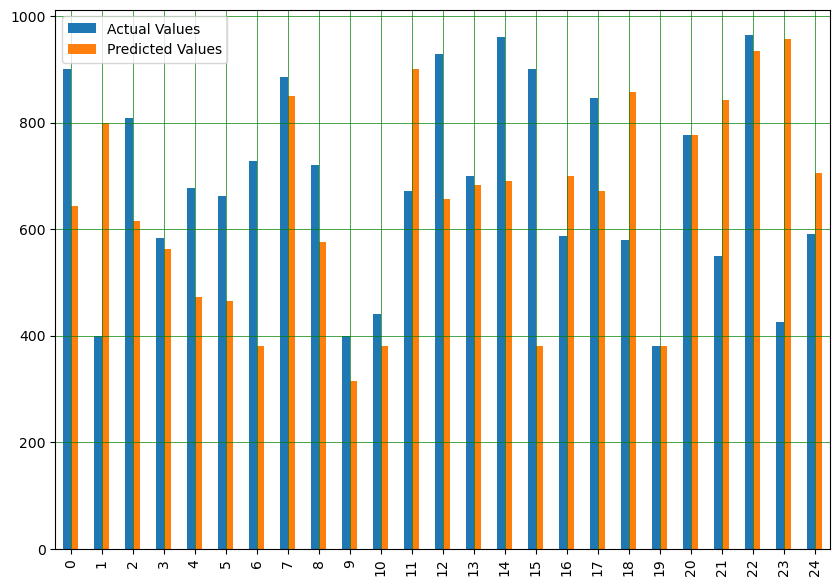

In [199]:
#Prepairng a Decision Tree Regression

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_pred=DTree.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

R2 score:  20.052637777939463
RMSE:  180.5166805727928
   Actual Values  Predicted Values
0          900.0        643.579241
1          400.0        657.854324
2          809.0        617.697650
3          583.0        639.129180
4          677.0        745.666295


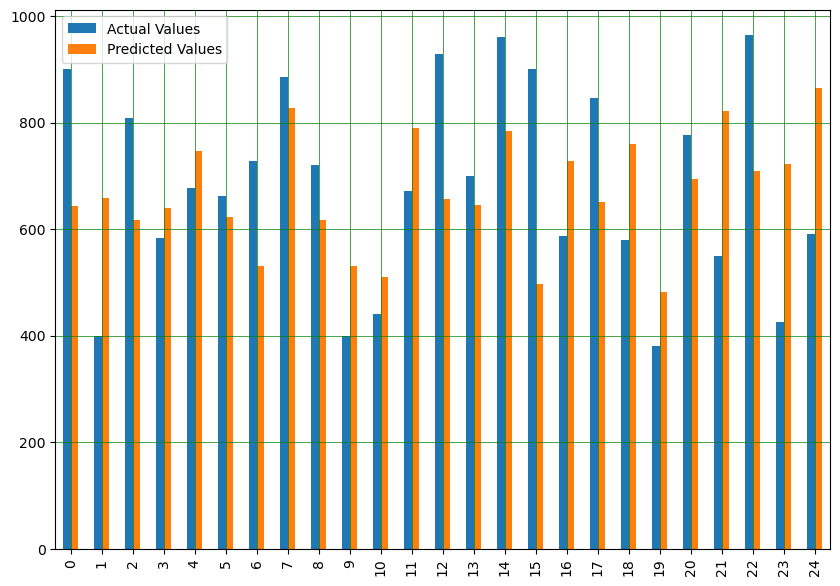

In [201]:
#Random forest regression 
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(X_train, y_train)

y_pred=regrRM2.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

R2 score:  15.927463531587582
RMSE:  185.11531246163744
   Actual Values  Predicted Values
0          900.0        634.394539
1          400.0        765.173955
2          809.0        613.682950
3          583.0        638.697883
4          677.0        780.540123


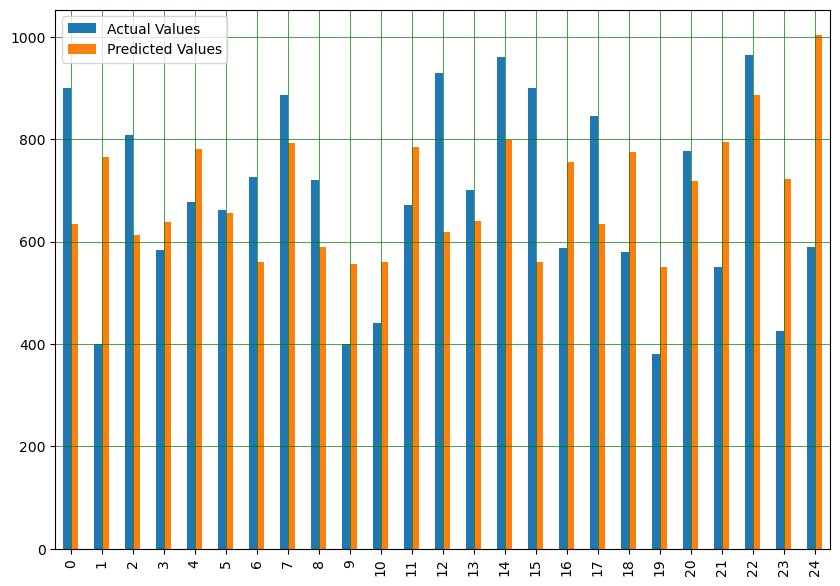

In [203]:
#Gradient Boosting Regressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

y_pred=GBoost.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [204]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 33951.49
R^2 Score: 0.17


In [205]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(learning_rate='constant', eta0=1e-4)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

# Başarı metriklerini yazdır
from sklearn.metrics import mean_squared_error, r2_score
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 34676.12
R^2 Score: 0.15
